In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

# Implementing Linier Regression in Python
## Simple Linier Regression with Scikit-learn

### Step 2 : Privide Data

In [2]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1)) # membuat data menjadi banyak baris, 1 kolom
y = np.array([5, 20, 14, 32, 22, 38])

### Step 3 : Create and Train (fit) Model

In [3]:
model = LinearRegression() # membuat instance/kelas ML

In [4]:
model.fit(x, y) #untuk melatih ML

LinearRegression()

In [5]:
model = LinearRegression().fit(x, y) # yang ditulis dalam satu baris

### Step 4 : Get Result

In [6]:
r_sq = model.score(x, y)
print('Coefficient of determination : ', r_sq)

Coefficient of determination :  0.715875613747954


In [7]:
print('Intercept : ', model.intercept_) #b0
print('Slope : ', model.coef_)

Intercept :  5.633333333333333
Slope :  [0.54]


In [8]:
y_pred = model.predict(x)
print('Predicted response : ', y_pred, sep='\n')

Predicted response : 
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


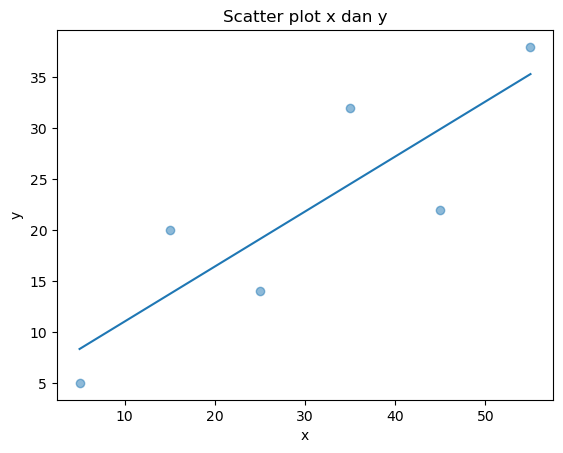

In [9]:
plt.scatter(x, y, alpha= 0.5)
plt.plot(x, y_pred)

plt.title('Scatter plot x dan y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [10]:
y_pred = model.intercept_ + model.coef_ * x
print('Predicted Response : ', y_pred, sep='\n')

Predicted Response : 
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


In [11]:
x_new = np.arange(5).reshape((-1, 1))
print(x_new)
y_new = model.predict(x_new)
print(y_new)

[[0]
 [1]
 [2]
 [3]
 [4]]
[5.63333333 6.17333333 6.71333333 7.25333333 7.79333333]


## Multiple Linear Regression With scikit-learn

### Step 1 : Import Packages and classes and provide data

In [12]:
x = [[0, 1], 
     [5, 1], 
     [15, 2],
     [25, 5], 
     [35, 11], 
     [45, 15], 
     [55, 34], 
     [60, 35]
    ]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [13]:
print(x)
print(y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]


In [14]:
model = LinearRegression().fit(x,y)

In [15]:
r_sq = model.score(x, y)
print('Coefficient of determination :',r_sq) #R^2
print('Intercept :', model.intercept_) # b0
print('Slope :', model.coef_) # b1 & b2

Coefficient of determination : 0.8615939258756776
Intercept : 5.52257927519819
Slope : [0.44706965 0.25502548]


In [16]:
y_pred = model.predict(x)
print('Predicted Response', y_pred, sep='\n')

Predicted Response
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [17]:
y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
print('Predicted Response', y_pred, sep='\n')

Predicted Response
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [18]:
x_new = np.arange(10).reshape(-1, 2) # membuat data baru
print(x_new)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


In [19]:
y_new = model.predict(x_new) # mendapatkan niali prediksi dari data baru
print(y_new)

[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


## Polynomial Regression with Scikit-Learn

### Step 1 : Import Package

In [20]:
from sklearn.preprocessing import PolynomialFeatures

### Step 2 : Provide Data

In [21]:
x = np.array([5,15,25,45,55]).reshape(-1,1)
y = np.array([15, 11, 2, 8, 32])
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [45]
 [55]]
[15 11  2  8 32]


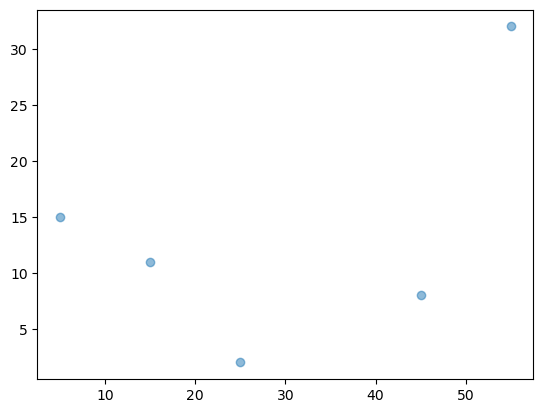

In [22]:
plt.scatter(x, y, alpha=.5)

### Step 2b : Transform Input Data

In [23]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [24]:
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [25]:
x_2 = transformer.transform(x)
x_2

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  45., 2025.],
       [  55., 3025.]])

In [26]:
x_2 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x) # untuk mendapatkan kolom baru yaitu X^2
x_2

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  45., 2025.],
       [  55., 3025.]])

### Step 3 : Get Result

In [27]:
r_sq = model.score(x_2, y)
print('Coefficient of determination :',r_sq) #R^2
print('Intercept :', model.intercept_) # b0
print('Slope :', model.coef_) # b1 & b2

Coefficient of determination : -1774.5243236296167
Intercept : 5.52257927519819
Slope : [0.44706965 0.25502548]


In [28]:
x2 = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x) # untuk mendapatkan kolom baru yaitu kolom berisi 1 semua untuk interceptnya (paling kiri) dan kolom X^2
x2

array([[1.000e+00, 5.000e+00, 2.500e+01],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 2.500e+01, 6.250e+02],
       [1.000e+00, 4.500e+01, 2.025e+03],
       [1.000e+00, 5.500e+01, 3.025e+03]])

In [29]:
model = LinearRegression(fit_intercept=False).fit(x2, y)

In [30]:
r_sq = model.score(x2, y)
print('Coefficient of determination :',r_sq) #R^2
print('Intercept :', model.intercept_) # b0
print('Slope :', model.coef_) # b1 & b2

Coefficient of determination : 0.8748494296039114
Intercept : 0.0
Slope : [26.1875     -1.83636364  0.03431818]


### Step 5 : Predict Respone 

In [31]:
y_pred = model.predict(x2)
print('Predicted Response', y_pred, sep='\n')

Predicted Response
[17.86363636  6.36363636  1.72727273 13.04545455 29.        ]


## Another Example

In [32]:
# Step 2: Provide Data
x = [
    [0, 1],
    [5, 1],
    [15, 2],
    [25, 5],
    [35, 11],
    [45, 15],
    [55, 34],
    [60, 35]
]
y = [4, 5, 20, 14, 32, 22, 38, 43]

x, y = np.array(x), np.array(y)

In [33]:
# Step 2: Provide Data
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x) # buat instance polynomialnya
x_

array([[0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
       [5.000e+00, 1.000e+00, 2.500e+01, 5.000e+00, 1.000e+00],
       [1.500e+01, 2.000e+00, 2.250e+02, 3.000e+01, 4.000e+00],
       [2.500e+01, 5.000e+00, 6.250e+02, 1.250e+02, 2.500e+01],
       [3.500e+01, 1.100e+01, 1.225e+03, 3.850e+02, 1.210e+02],
       [4.500e+01, 1.500e+01, 2.025e+03, 6.750e+02, 2.250e+02],
       [5.500e+01, 3.400e+01, 3.025e+03, 1.870e+03, 1.156e+03],
       [6.000e+01, 3.500e+01, 3.600e+03, 2.100e+03, 1.225e+03]])

In [34]:
# Step 3: Create and Fit Model
model = LinearRegression().fit(x_, y)

In [35]:
# Step 4: Get Result
r_sq = model.score(x_, y)
print('Coefficient of determination :',r_sq) #R^2
print('Intercept :', model.intercept_) # b0
print('Slope :', model.coef_) # b1 & b2

Coefficient of determination : 0.945370144912782
Intercept : 0.8430556452396445
Slope : [ 2.44828275  0.16160353 -0.15259677  0.47928683 -0.4641851 ]


# Advanced Linear Regression with Statsmodel

In [36]:
# Import Package 
import statsmodels.api as sm

In [37]:
# Step 2 : Provide Data
x = [
    [0, 1],
    [5, 1],
    [15, 2],
    [25, 5],
    [35, 11],
    [45, 15],
    [55, 34],
    [60, 35]
]
y = [4, 5, 20, 14, 32, 22, 38, 43]

x, y = np.array(x), np.array(y)

In [38]:
x = sm.add_constant(x)
x

array([[ 1.,  0.,  1.],
       [ 1.,  5.,  1.],
       [ 1., 15.,  2.],
       [ 1., 25.,  5.],
       [ 1., 35., 11.],
       [ 1., 45., 15.],
       [ 1., 55., 34.],
       [ 1., 60., 35.]])

In [39]:
# Step 3 : Create and Train Model
model = sm.OLS(y, x)

In [40]:
result = model.fit()

In [41]:
# Step 4 : Get Result
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Wed, 04 Oct 2023   Prob (F-statistic):            0.00713
Time:                        18:41:32   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [42]:
print(result.rsquared)
print(result.rsquared_adj)
print(result.params)

0.8615939258756776
0.8062314962259487
[5.52257928 0.44706965 0.25502548]


In [43]:
# Step 5 : Predict Response
print('Predicted Response :', result.fittedvalues, sep='\n')

Predicted Response :
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [44]:
print('Predicted Response :', result.predict(x), sep='\n')

Predicted Response :
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [45]:
x_new = sm.add_constant(np.arange(10).reshape((-1,2)))
print(x_new)

[[1. 0. 1.]
 [1. 2. 3.]
 [1. 4. 5.]
 [1. 6. 7.]
 [1. 8. 9.]]


In [46]:
y_new = result.predict(x_new)
print(y_new)

[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


# Implementing Linear Regression on Real Dataset
## Using Statsmodels

In [50]:
import numpy as np
import pandas as pd

In [51]:
# Step 2 : Provide Data
df_boston = pd.read_csv('Boston.csv')
df_boston

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [52]:
df = df_boston.iloc[:, :-1]
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [57]:
target = df_boston.iloc[:, -1]
target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [58]:
X = df['rm']
y = target.values

In [59]:
# Step 3: Create and Train Model
model = sm.OLS(y, X).fit()

# Step 5: Predict Response
prediction = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Wed, 04 Oct 2023   Prob (F-statistic):                   3.74e-256
Time:                        19:05:17   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rm             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

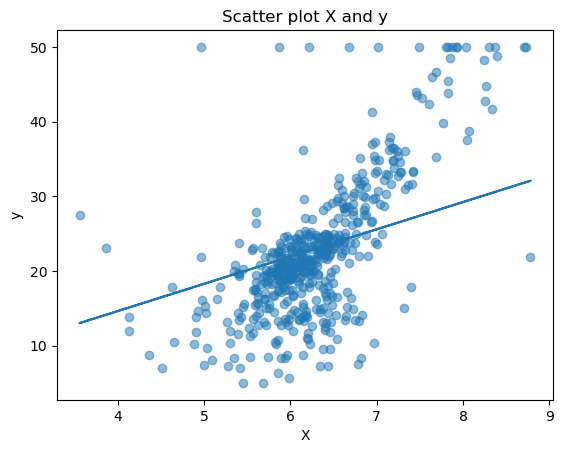

In [60]:
plt.scatter(X, y, alpha=.5)
plt.plot(X, prediction)
plt.title('Scatter plot X and y')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## SKLearn

In [61]:
from sklearn import linear_model

In [62]:
df = pd.read_csv('Boston.csv')
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [63]:
X = df.iloc[:, :-1]
y = df['medv']

In [64]:
lm = linear_model.LinearRegression() # model
model = lm.fit(X, y) # train

In [65]:
predictions = lm.predict(X) # predict
print(predictions)

[30.42139705 25.32201271 30.93787876 29.00076639 28.31367253 25.59109298
 23.41776451 19.86003091 11.80079741 19.25221729 19.31757645 21.93417535
 21.37335055 19.97132628 19.64471922 19.72477049 21.02876991 17.26683832
 16.64190966 18.79414186 12.81454018 18.00166711 16.15317366 14.08888285
 15.97706284 13.69000983 15.76077548 15.01071435 19.85567505 21.21061313
 11.72464276 18.3364835   9.10541714 14.55587131 13.97628181 24.16472748
 22.70101782 23.51285903 23.34895525 31.85526903 34.74192937 28.42640283
 25.57831499 24.98137303 23.21504114 22.38303526 20.70575091 18.16912479
  9.17214033 17.37968931 21.55074815 24.20356439 28.01255736 24.38286025
 15.85263572 31.6059808  25.23437016 33.53013564 22.19397258 21.45986174
 18.17861552 18.75425861 24.31445383 22.93434158 23.53074304 30.84518329
 25.9540369  21.47886121 17.72849634 21.11394381 25.58675036 22.07846818
 24.92619814 24.41509824 25.98547797 24.33459984 23.2360217  23.71881155
 21.58385377 22.79609688 28.73302722 27.21653869 26

In [66]:
lm.score(X, y)

0.7414197819753733

In [68]:
df_car = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/CarPrice_Assignment.csv', usecols=['horsepower', 'price'])
df_car

,horsepower,price
0,111,13495.0
1,111,16500.0
2,154,16500.0
3,102,13950.0
4,115,17450.0
...,...,...
200,114,16845.0
201,160,19045.0
202,134,21485.0
203,106,22470.0


In [69]:
df_car.shape

(205, 2)

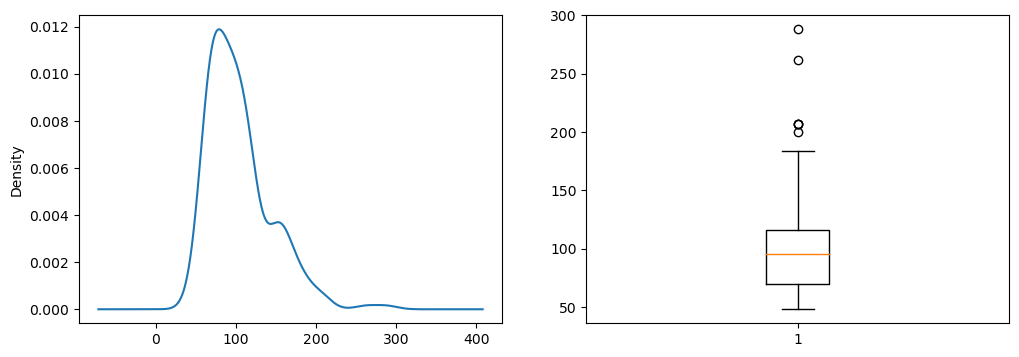

In [73]:
f = plt.figure(figsize=(12, 4))

f.add_subplot(1,2,1)
df_car['horsepower'].plot(kind='kde')

f.add_subplot(1, 2, 2)
plt.boxplot(df_car['horsepower'])
plt.show()

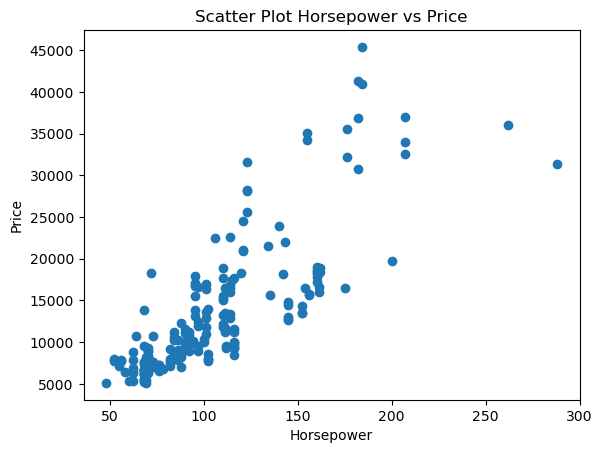

In [74]:
plt.scatter(df_car['horsepower'], df_car['price'])

plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter Plot Horsepower vs Price')
plt.show()

In [75]:
df_car.corr()

,horsepower,price
horsepower,1.000000,0.808139
price,0.808139,1.000000


In [77]:
x = df_car['horsepower'].values.reshape(-1, 1)
y = df_car['price'].values.reshape(-1, 1)

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [81]:
x_train.shape

(164, 1)

In [82]:
x_test.shape

(41, 1)

In [84]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [86]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

LinearRegression()

In [87]:
print(lin_reg.coef_)

[[159.44189747]]


In [88]:
print(lin_reg.intercept_)

[-3308.14383143]


In [89]:
lin_reg.score(x_test, y_test)

0.6529767506609998

Text(0.5, 1.0, 'Plot Horsepower vs Price')

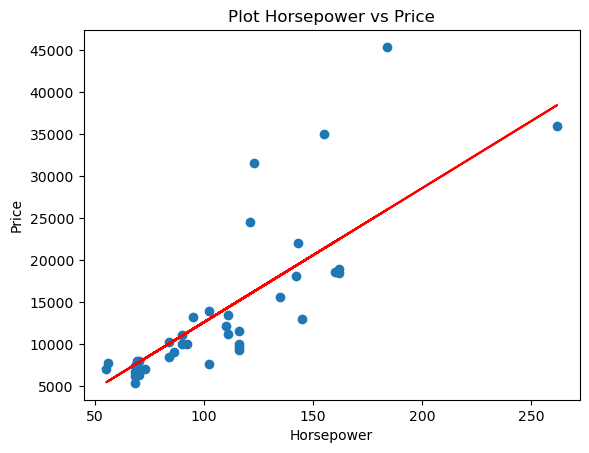

In [90]:
y_prediction = lin_reg.predict(x_test)

plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediction, c='r')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs Price')

In [91]:
lin_reg.predict([[100]])

array([[12636.04591531]])

In [92]:
lin_reg.predict([[150]])

array([[20608.14078868]])

In [93]:
lin_reg.predict([[200]])

array([[28580.23566205]])